# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Understanding the structure of the data

In [2]:
# Mounting google drive
#from google.colab import drive
#drive.mount('/content/drive/')

In [4]:
# Loading the data
df = pd.read_csv(r'../data/foodhub_order.csv')
# returns the first 5 rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/niraj/myworkspaces/GHE/niraj.gurupanchayan/21-days-of-automation/food-hub/foodhub_order.csv'

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Calculating number of row s and columns
rows = df.shape[0]
columns = df.shape[1]
print(f"The imported dataset has {rows} rows and {columns} columns")

The imported dataset has 1898 rows and 9 columns


#### Observations:
There are 1898 rows and 9 columns in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Printing a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 4 columns of type integer, one of the columns *cost of the order* of type float, and there are further 4 columns of type string.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Finding the missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

It is clear that there are no missing values in any of the rows.

However, it appears that customers do not consistently provide ratings for the food in the app. Hence, rating for some of the rows is marked as "Not given".

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Minimum, average and mnax time for preparting the food
print(f"Minimum time to prepare the food is {df['food_preparation_time'].min()} mins")
print(f"Average time to prepare the food is {df['food_preparation_time'].mean().round(1)} mins")
print(f"Maximum time to prepare the food is {df['food_preparation_time'].max()} mins")

Minimum time to prepare the food is 20 mins
Average time to prepare the food is 27.4 mins
Maximum time to prepare the food is 35 mins


#### Observations:
The shortest time to prepare the food is 20 mins, while sometimes it can go upto 35 mins to prepare the food.
On average, it takes 27 mins to prepare the food.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Working out the orders that have rating as "Not given"
(df['rating'] == "Not given").sum()

736

#### Observations:
Out of 1898 instances when food was ordered and delivered through FoodHub app, customers choose not to rate the food 736 times.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### *Univariate Analysis for Customer ID*

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64
Customer ID: 52832 ordered maximum number of times


<Axes: xlabel='customer_id', ylabel='count'>

Text(0.5, 0, 'Customer ID')

Text(0, 0.5, 'Number of orders')

Text(0.5, 1.0, 'Customer with most orders')

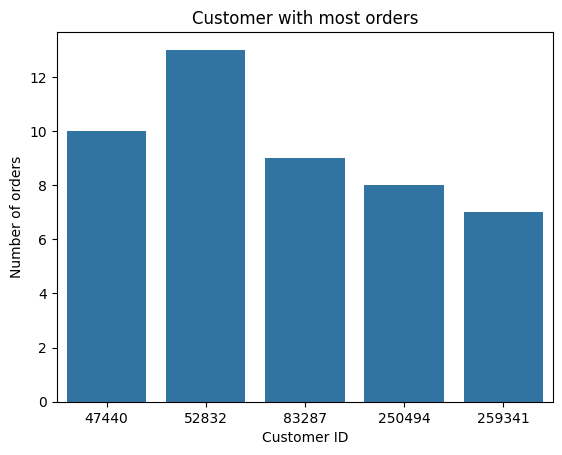

In [9]:
# Calculate the number of orders made by each customer through the app
number_of_orders = df['customer_id'].value_counts()
print(number_of_orders)

# Customer with the most number of orders
top_customer = df['customer_id'].value_counts().idxmax()
print(f"Customer ID: {top_customer} ordered maximum number of times")

# We observe there are number of customers who have ordered only once.
# Plotting the graphs of 5 customers with most orders
top_5_customers = df['customer_id'].value_counts().head(5)
sns.barplot(top_5_customers)
plt.xlabel("Customer ID")
plt.ylabel("Number of orders")
plt.title("Customer with most orders")
plt.show()

### Observations:
We see that one of the customers has ordered 13 times and top customers have ordered food 7 times or more through the FoodHub app.

### *Univariate Analysis for Restaurant names*

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
Most popular restaurant is: Shake Shack


<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='restaurant_name'>

Text(0.5, 0, 'Restaurant name')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 10 restaurants')

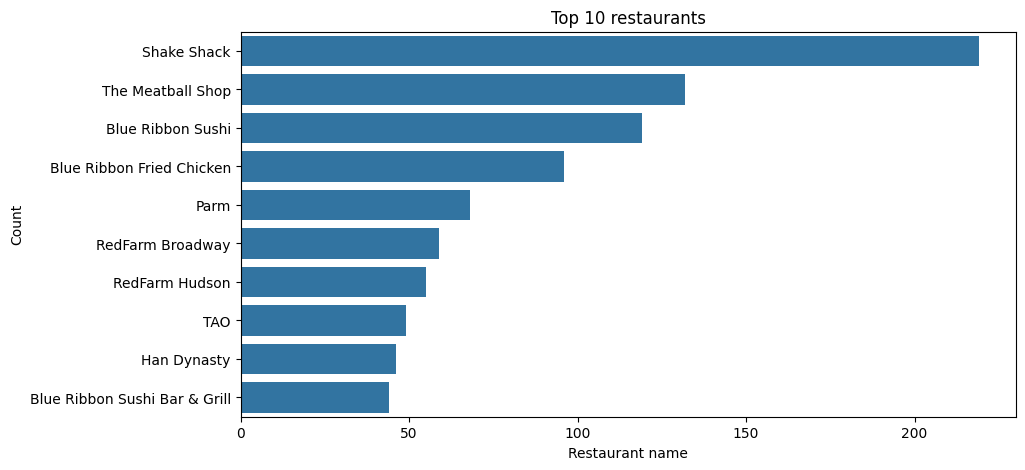

In [10]:
# Find the number of orders that each restaurant served
restaurant_name_counts = df['restaurant_name'].value_counts()
print(restaurant_name_counts)

# Find the most popular restaurant
popular_restaurant = df['restaurant_name'].value_counts().head(1)
print(f"Most popular restaurant is: {popular_restaurant.idxmax()}")

# Plot of top 10 restaurants
plt.figure(figsize=(10,5))
top_10_restaurants = df['restaurant_name'].value_counts().head(10)
sns.barplot(x=top_10_restaurants.values, y=top_10_restaurants.index)
plt.xlabel("Restaurant name")
plt.ylabel("Count")
plt.title("Top 10 restaurants")
plt.show()

### Observations:
*Shake Shack* is the most popular restaurant catering to 219 orders.
*The Meatball Shop* is the second most popular restaurant handling 132 deliveries.

### *Univariate Analysis for Cuisine Type*

Most popular cuisine is: American
Top 10 cuisines are cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='cuisine_type'>

Text(0.5, 0, 'Cuisine Type')

Text(0, 0.5, 'Number of orders')

Text(0.5, 1.0, 'Top 10 cuisine types')

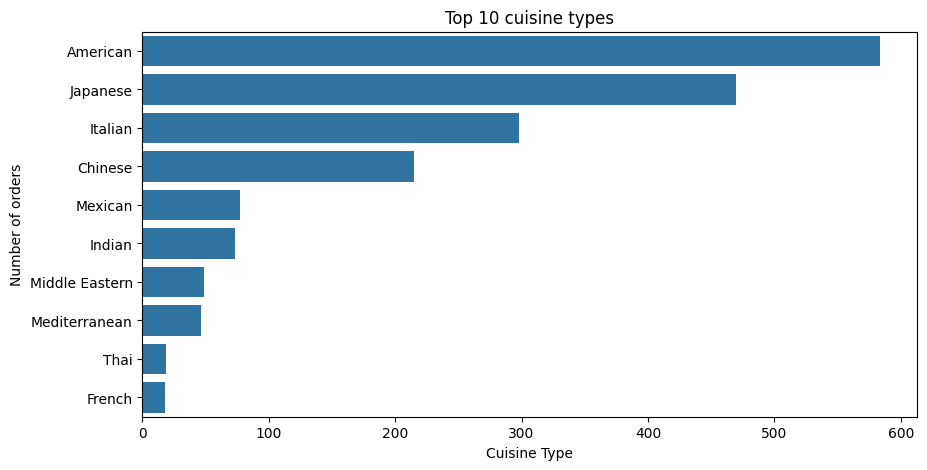

In [11]:
# Find the most and least popular cuisine types
most_popular_cuisine = df['cuisine_type'].value_counts().idxmax()
print(f"Most popular cuisine is: {most_popular_cuisine}")

# Popular 10 cuisine types
top_10_cuisines = df['cuisine_type'].value_counts().head(10)
print(f"Top 10 cuisines are {top_10_cuisines}")

#Plotting 
plt.figure(figsize=(10,5))
top_10_cuisines = df['cuisine_type'].value_counts().head(10)
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index)
plt.xlabel("Cuisine Type")
plt.ylabel("Number of orders")
plt.title("Top 10 cuisine types")
plt.show()

### Observations:
*American* has emerged as the most popular cuisine, followed by *Japanese* cuisine taking the second spot.

### *Univariate Analysis for Cost of the order*

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='cost_of_the_order'>

Text(0.5, 0, 'Cost of order')

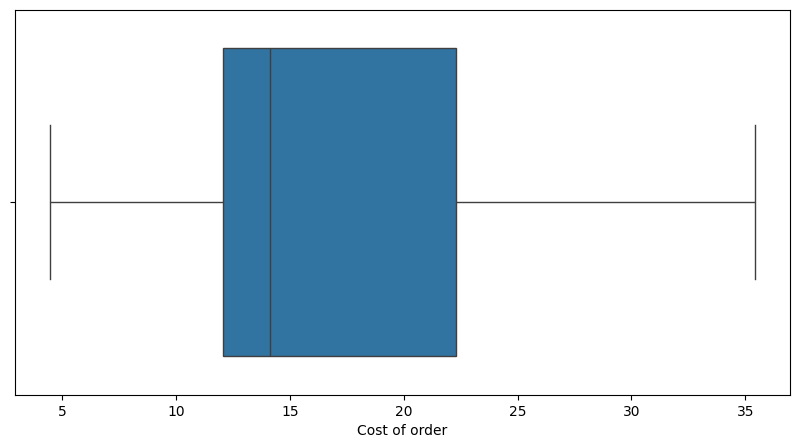

In [12]:
# Cost of the order
# Most costly and cheapest cost of order

df['cost_of_the_order'].describe()

#Plotting the cost of order
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='cost_of_the_order', showfliers= True)
plt.xlabel("Cost of order")
plt.show()

### Observations:
We see that most expensive food order is $35.4 and the cheapest order is $4.4. The average cost of order is $16.4.

### *Univariate Analysis for days of the week*

([<matplotlib.patches.Wedge at 0x7efe42b57bb0>,
 [Text(-0.679107125435181, 0.8653401135872332, 'Weekend'),
  Text(0.6791071254351813, -0.865340113587233, 'Weekday')],
 [Text(-0.3704220684191896, 0.472003698320309, '71%'),
  Text(0.37042206841918973, -0.4720036983203088, '29%')])

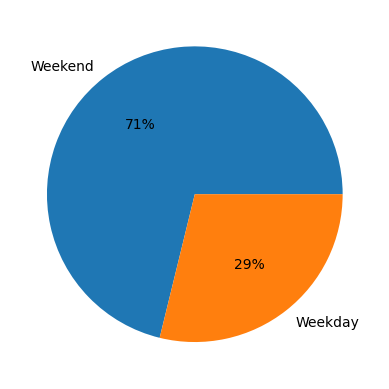

In [13]:
#Days of the week
# Which days(weekdays or weekends?) are popular for ordering the food
order_days = df['day_of_the_week'].value_counts()
unique_day_of_the_week = df['day_of_the_week'].unique()

# Plotting the pie graph to show percentage of weekday and weekends
plt.pie(order_days, labels = unique_day_of_the_week, autopct='%.0f%%')
plt.show()

### Observations:
We observe that 71% of the orders were on weekends and only 29% of the orders were on weekdays.

### *Univariate Analysis for rating*

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


<Axes: xlabel='percent', ylabel='rating'>

Text(0.5, 0, 'Percentage')

Text(0, 0.5, 'Ratings')

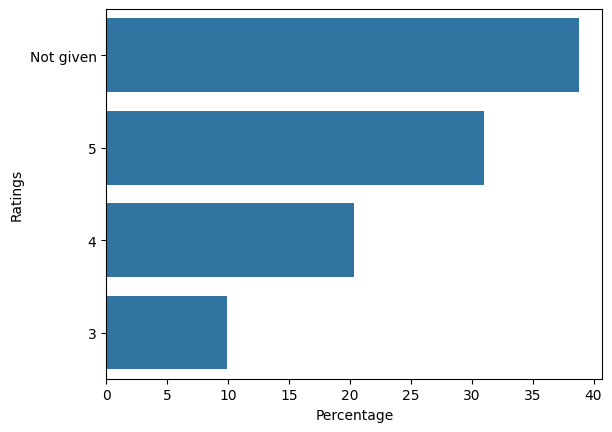

In [14]:
# Max rating, min rating and when customers choose not to rate
unique_ratings = df['rating'].value_counts()
print(unique_ratings)

# Plot bar graph of unique ratings
sns.countplot(y = df['rating'], order = df.rating.value_counts().index, stat='percent')
plt.xlabel("Percentage")
plt.ylabel("Ratings")
plt.show()

### Observations:
We see that customers not rated the orders 736 times or around 39% of the times as rating is not mandatory.
Out of the orders that were rated, customers gave top rating of 5 to 588 deliveries or around 32%. The least rating 3 is given to around 10% of the orders.

### *Univariate Analysis for Food preparation time*

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

27.0

<Axes: ylabel='food_preparation_time'>

Text(0, 0.5, 'Food preparation time in mins')

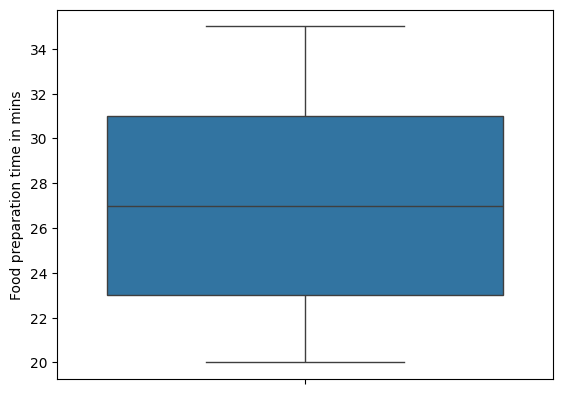

In [15]:
## Food preparation time
# What is the  max and min delivery time. What are the outliers.
df['food_preparation_time'].describe()
df['food_preparation_time'].median()

# Plot box plot to check outliers
sns.boxplot(data=df['food_preparation_time'])
plt.ylabel("Food preparation time in mins")
plt.show()

### Observations:
The maximum time to prepare the food is 35 mins whereas the minimum time to prepare the food is 20 mins.
The average time to prepare the food is 27 mins.
We observe that mean time to prepare the food is very close to median time to prepare the food.

### *Univariate Analysis for Delivery time*

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

25.0

<Axes: ylabel='delivery_time'>

Text(0, 0.5, 'Delivery time in mins')

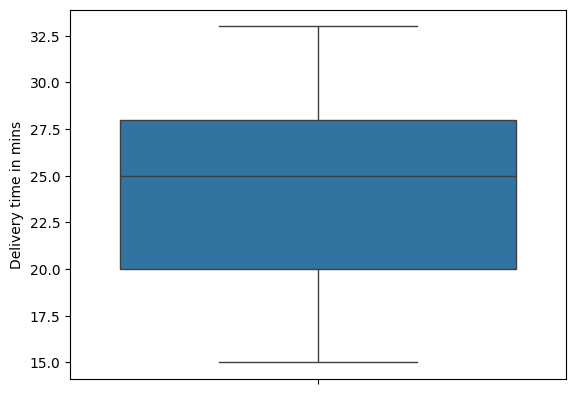

<Axes: xlabel='delivery_time', ylabel='Count'>

Text(0.5, 0, 'Delivery time in mins')

Text(0, 0.5, 'Count')

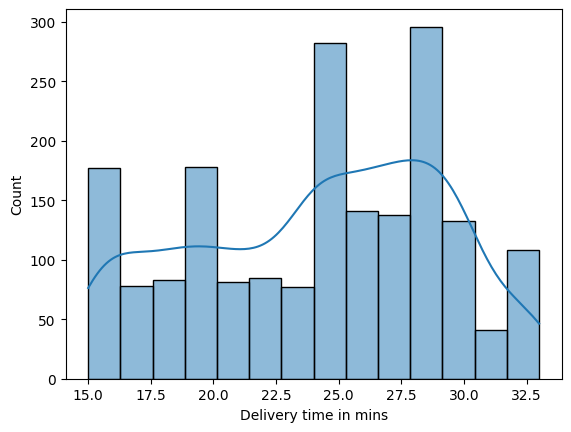

In [16]:
# What is the  max and minimum delivery time. What are the outliers and what is the average time to deliver. There could be traffic conditions.
df['delivery_time'].describe()
df['delivery_time'].median()

# Plot box plot to check outliers
sns.boxplot(data=df['delivery_time'])
plt.ylabel("Delivery time in mins")
plt.show()

# Plot histogram with kde=True to check the distribution
sns.histplot(data=df['delivery_time'], kde= True)
plt.xlabel("Delivery time in mins")
plt.ylabel("Count")
plt.show()

### Observations:
Food delivery time is between 15 to 33 mins.
The average time to deliver the food is 24 mins.
We observe that mean time to deliver the food is  close to median time to deliver the food.
Most of the deliveries were done between 25 to 30 mins.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# Fetching top 5 restaurants
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(f"Top 5 restaurants in terms of orders received: ")
print(top_5_restaurants)

Top 5 restaurants in terms of orders received: 
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
Shake Shack is the most popular restaurant with 219 orders received. Parm is the 5th popular restaurant with 68 orders received.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
# Find most popular cuisine on weekends
# popular_cuisine_on_weekend = df.groupby(['day_of_the_week', 'cuisine_type']).count()

# Find number of orders on weekend
weekend_orders = df.loc[df['day_of_the_week'] == "Weekend"]

# Find weekend orders sorted by cuisine counts
weekend_orders_by_cuisine = weekend_orders['cuisine_type'].value_counts()

# Find the most popular cuisine
print(weekend_orders_by_cuisine)
print(f"Most popular cuisine on weekends is : {weekend_orders_by_cuisine.idxmax()}")

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64
Most popular cuisine on weekends is : American


#### Observations:
Most popular cuisine type ordered on weekends in American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Percentage of orders more than $20
#Total orders is the number of rows in the dataset
total_orders = df.shape[0]

#Find orders that costed more than $20
orders_excess_20_dollars = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].count()

# Find percentage of orders that costed more than $20 and round it to 2 decimal places
percentage_excess_20_dollars = orders_excess_20_dollars*100/total_orders
print(f"Percentage of orders that costed more than 20 dollars is: {percentage_excess_20_dollars.round(2)}%")

Percentage of orders that costed more than 20 dollars is: 29.24%


#### Observations:
We see that around 20.24% orders costed more than $20. It means majority of the orders were cheaper than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
# Finding mean delivery time and round it to 1 decimal place
mean_delivery_time= df['delivery_time'].mean().round(1)
print(f"Mean delivery time is {mean_delivery_time} mins")

Mean delivery time is 24.2 mins


#### Observations:
Mean order delivery time is 24.2 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Finding top 3 customers by number of deliveries
top_3_frequent_customers = df['customer_id'].value_counts().nlargest(3)
print("Here are top 3 frequent customers: ")
for i in range(3):
    print(f"Customer ID {top_3_frequent_customers.index[i]} has placed {top_3_frequent_customers.values[i]} orders")

Here are top 3 frequent customers: 
Customer ID 52832 has placed 13 orders
Customer ID 47440 has placed 10 orders
Customer ID 83287 has placed 9 orders


#### Observations:
The most frequent customer has ordered food 13 times through the app.
The top 3 customers have ordered food 32 times through the app.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [22]:
# Write the code here
# numerical_values = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
#       'cost_of_the_order', 'day_of_the_week', 'rating',
#       'food_preparation_time', 'delivery_time']
#sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True)
df

#TODO replace "Not given" ratings with some values 
#Quicker delivery times & food preparation time may mean more orders?
# weekday orders coming from same customer being late?
# A restaurant specializing in a special cuisine type may get more orders
# Higher rating may mean more orders
# Higher r

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


### Multivariate analysis Cuisine Type vs Cost of the order

Average cost of order by cuisine type: 
  cuisine_type  cost_of_the_order
0     American          16.319829
1      Chinese          16.305209
2       French          19.793889
3       Indian          16.919726
4      Italian          16.418691


<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

Text(0.5, 0, 'Cuisine type')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'American'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Indian'),
  Text(4, 0, 'Italian'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Korean'),
  Text(7, 0, 'Mediterranean'),
  Text(8, 0, 'Mexican'),
  Text(9, 0, 'Middle Eastern'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'Spanish'),
  Text(12, 0, 'Thai'),
  Text(13, 0, 'Vietnamese')])

Text(0, 0.5, 'Average cost of the order')

Text(0.5, 1.0, 'Cuisine Type vs Average cost')

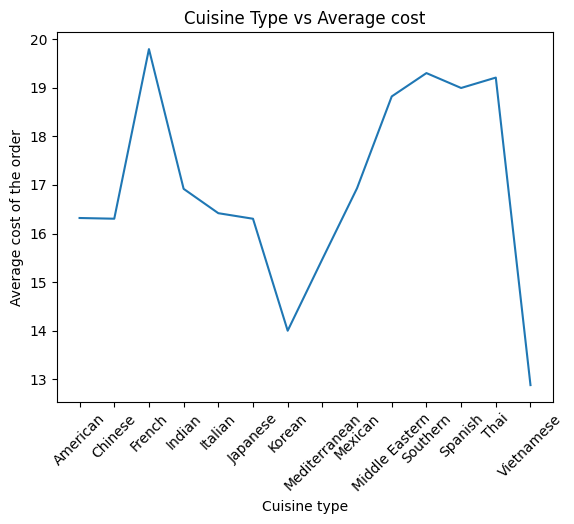

Sum cost of order by cuisine type: 
  cuisine_type  cost_of_the_order
0     American            9530.78
1      Chinese            3505.62
2       French             356.29
3       Indian            1235.14
4      Italian            4892.77


<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

Text(0.5, 0, 'Cuisine type')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'American'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Indian'),
  Text(4, 0, 'Italian'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Korean'),
  Text(7, 0, 'Mediterranean'),
  Text(8, 0, 'Mexican'),
  Text(9, 0, 'Middle Eastern'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'Spanish'),
  Text(12, 0, 'Thai'),
  Text(13, 0, 'Vietnamese')])

Text(0, 0.5, 'Total cost of the order')

Text(0.5, 1.0, 'Cuisine Type vs Total cost of order')

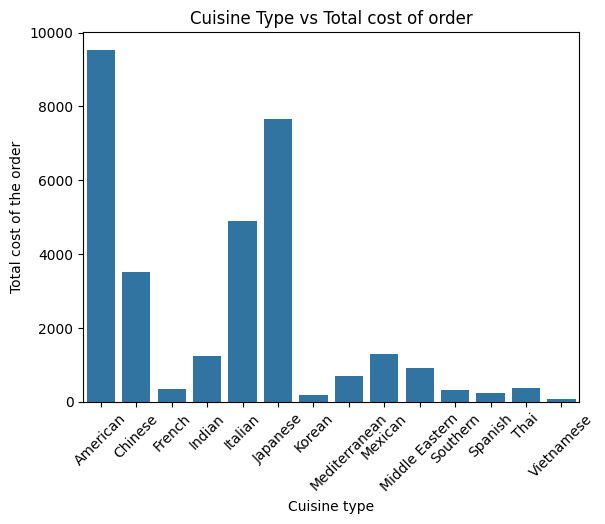

In [23]:
# Multivariate analysis Cuisine Type vs Cost of the order
# Checking if certain cuisines are costlier

# Cusine vs Average cost
average_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().reset_index()
print(f"Average cost of order by cuisine type: \n{average_cost_by_cuisine.head()}")

# Plot average cost and check the cuisine
sns.lineplot(data=average_cost_by_cuisine, 
             x="cuisine_type", y="cost_of_the_order")
plt.xlabel("Cuisine type")
plt.xticks(rotation=45)
plt.ylabel("Average cost of the order")
plt.title("Cuisine Type vs Average cost")
plt.show()


# Cusine vs Sum of order cost
total_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].sum().reset_index()
print(f"Sum cost of order by cuisine type: \n{total_cost_by_cuisine.head()}")

# Plot average cost and check the cuisine
sns.barplot(data=total_cost_by_cuisine, 
            x="cuisine_type", y="cost_of_the_order")
plt.xlabel("Cuisine type")
plt.xticks(rotation=45)
plt.ylabel("Total cost of the order")
plt.title("Cuisine Type vs Total cost of order")
plt.show()

### Observations:
Looking at the charts above, we observe that:
- Average cost of French cuisine is the highest and Vietnamese cuisine is the lost.
- American cuisine has the highest total of orders followed by Japanese cuisine.

### Multivariate analysis for Days of the week vs Delivery time

Average delivery time based on days of the week: 
  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

Text(0.5, 0, 'Days of the week')

Text(0, 0.5, 'Delivery time')

Text(0.5, 1.0, 'Delivery time vs days of the week')

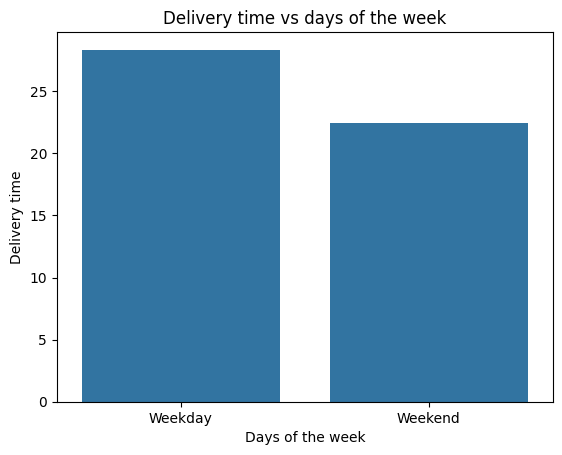

Sum delivery time based on days of the week:: 
  day_of_the_week  delivery_time
0         Weekday          15502
1         Weekend          30357


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

Text(0.5, 0, 'Days of the week')

Text(0, 0.5, 'Delivery time')

Text(0.5, 1.0, 'Total Delivery time vs days of the week')

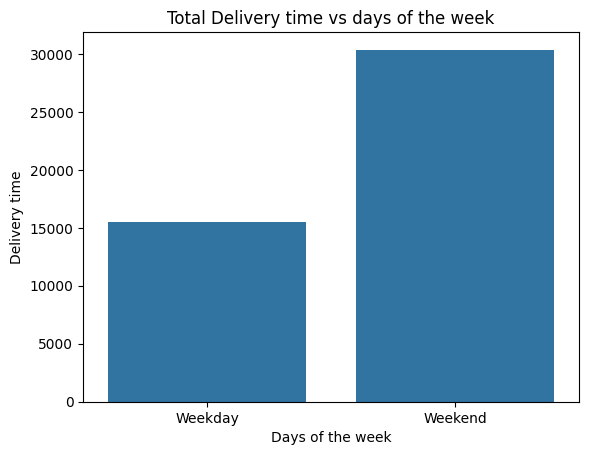

In [24]:
# Multivariate analysis days of the week vs delivery time
# Checking if order deliveries are faster on weekends or weekdays

# Find average delivery time for day of the week
average_time_based_on_days = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
print(f"Average delivery time based on days of the week: \n{average_time_based_on_days.head()}")

# Plot bar graph
sns.barplot(data=average_time_based_on_days, 
            x="day_of_the_week", y= "delivery_time")
plt.xlabel("Days of the week")
plt.ylabel("Delivery time")
plt.title("Delivery time vs days of the week")
plt.show()


# Find total delivery time for day of the week
total_delivery_by_days = df.groupby('day_of_the_week')['delivery_time'].sum().reset_index()
print(f"Sum delivery time based on days of the week:: \n{total_delivery_by_days.head()}")

# Plot average cost and check the cuisine
sns.barplot(data=total_delivery_by_days, 
            x="day_of_the_week", y= "delivery_time")
plt.xlabel("Days of the week")
plt.ylabel("Delivery time")
plt.title("Total Delivery time vs days of the week")
plt.show()

### Observations:
From the charts above:
* Average delivery time on weekdays is higher than on weekends
* Total delivery time on weekends is more than total delivery time on weekedays. This is because there are more orders placed on weekends than number of orders on weekdays.

### Multivariate analysis for Day of the week vs Food prepartion time

Average Food preparation time based on days of the week: 
  day_of_the_week  food_preparation_time
0         Weekday              27.212066
1         Weekend              27.436714


<Axes: xlabel='day_of_the_week', ylabel='food_preparation_time'>

Text(0.5, 0, 'Days of the week')

Text(0, 0.5, 'Food preparation time')

Text(0.5, 1.0, 'Food preparation time vs days of the week')

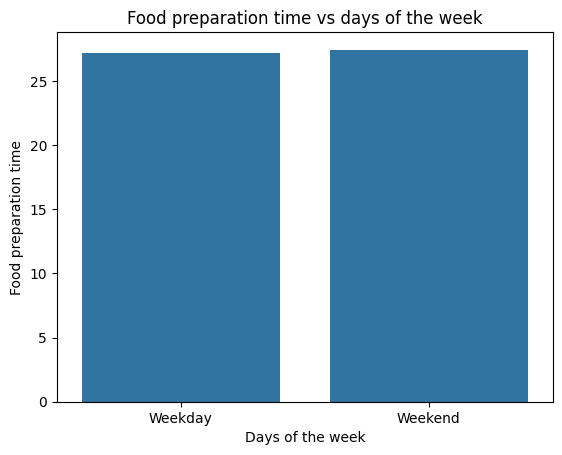

Sum of Food preparation time based on days of the week:: 
  day_of_the_week  food_preparation_time
0         Weekday                  14885
1         Weekend                  37067


<Axes: xlabel='day_of_the_week', ylabel='food_preparation_time'>

Text(0.5, 0, 'Days of the week')

Text(0, 0.5, 'Food preparation time')

Text(0.5, 1.0, 'Total Food preparation time vs days of the week')

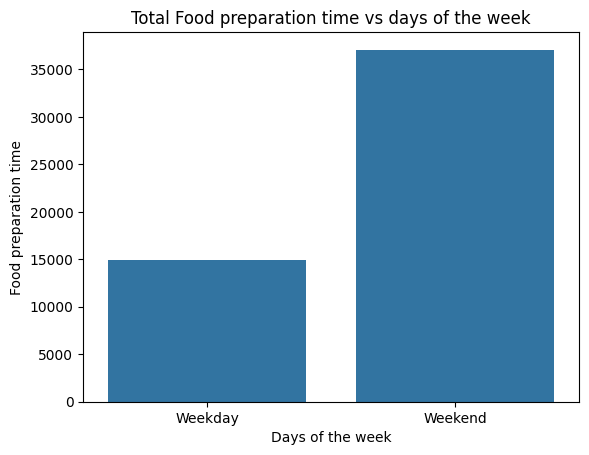

In [25]:
# Multivariate analysis for days of the week vs food preparation time
# Checking if order deliveries are faster on weekends or weekdays

# Find average delivery time for day of the week
average_prep_time_based_on_days = df.groupby('day_of_the_week')['food_preparation_time'].mean().reset_index()
print(f"Average Food preparation time based on days of the week: \n{average_prep_time_based_on_days.head()}")

# Plot bar graph
sns.barplot(data=average_prep_time_based_on_days, 
            x="day_of_the_week", y= "food_preparation_time")
plt.xlabel("Days of the week")
plt.ylabel("Food preparation time")
plt.title("Food preparation time vs days of the week")
plt.show()


# Find total delivery time for day of the week
total_prep_time_by_days = df.groupby('day_of_the_week')['food_preparation_time'].sum().reset_index()
print(f"Sum of Food preparation time based on days of the week:: \n{total_prep_time_by_days.head()}")

# Plot average cost and check the cuisine
sns.barplot(data=total_prep_time_by_days, 
            x="day_of_the_week", y= "food_preparation_time")
plt.xlabel("Days of the week")
plt.ylabel("Food preparation time")
plt.title("Total Food preparation time vs days of the week")
plt.show()

### Observations:
We observe that:
* Average food preparation time is same for weekdays and weekends
* Total food prepartion time for weekends in more than food prepartion time for weekdays. This is because more orders are received on weekends than the number of orders received on weekdays.

### Multivariate analysis for Rating vs Delivery time

<Axes: xlabel='rating', ylabel='delivery_time'>

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Delivery time')

Text(0.5, 1.0, 'Rating vs Delivery time')

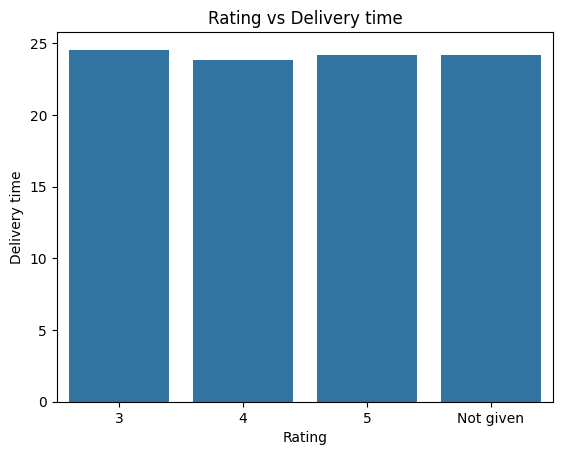

In [33]:
# Checking if quicker delivery times results in better rating
delivery_time_for_ratings = df.groupby('rating')['delivery_time'].mean().reset_index()

sns.barplot(data=delivery_time_for_ratings,
            x= 'rating', y= 'delivery_time')
plt.xlabel("Rating")
plt.ylabel("Delivery time")
plt.title("Rating vs Delivery time")
plt.show()


### Observations:
We observe that there is not much difference in the rating of the order when compared with the average delivery time.

### Multivariate analysis for Rating vs Food preparation time

### Observations:

### Multivariate analysis for Cost of order vs Rating

### Observations:

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [27]:
# Find restaurants with restaurant > 50 and average rating> 4

# Drop rows where rating is not provided
only_rated_orders = df[df['rating'] !="Not given"].copy()

# Convert ratings into float type
only_rated_orders['rating'] = only_rated_orders['rating'].astype(float)

# Get the restaurant names with count more than 50
only_rated_orders_count = only_rated_orders.groupby('restaurant_name')['rating'].count().sort_values().reset_index()
restaurant_name_count_50 = only_rated_orders_count[only_rated_orders_count['rating'] > 50]['restaurant_name']
print(f"Restaurant with rating count more than 50 are: \n{restaurant_name_count_50}")
print("We see there are only 4 restaurants with rating count more than 50")

# Get restaurants with average rating more than 4
restaurant_name_avg_4 = only_rated_orders_count.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).head()
print(f"Average ratings of restaurants are: \n{restaurant_name_avg_4}")

Restaurant with rating count more than 50 are: 
152    Blue Ribbon Fried Chicken
153            Blue Ribbon Sushi
154            The Meatball Shop
155                  Shake Shack
Name: restaurant_name, dtype: object
We see there are only 4 restaurants with rating count more than 50
Average ratings of restaurants are: 
restaurant_name
Shake Shack                  133.0
The Meatball Shop             84.0
Blue Ribbon Sushi             73.0
Blue Ribbon Fried Chicken     64.0
RedFarm Broadway              41.0
Name: rating, dtype: float64


#### Observations:
We observe that there are only 4 restaurants that have count more than 50 and average rating of more than 4. These are:
- Blue Ribbon Fried Chicken
- Blue Ribbon Sushi
- The Meatball Shop
- Shake Shack


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [28]:
# Calculate the net revenue of the company
revenue_orders_more_than_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum()*0.25 
revenue_orders_more_than_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20)]['cost_of_the_order'].sum()*0.15
total_revenue = revenue_orders_more_than_20 + revenue_orders_more_than_5
print(f"Total revenue of the company across all orders is ${total_revenue}")

Total revenue of the company across all orders is $6166.303


#### Observations:
Total revenue of the company across all orders is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [29]:
# Find the percentage of orders that took more than 60 mins

# Find total delivery time
df['total_time_delivery'] = df['food_preparation_time'] + df['delivery_time']

# Find total number of orders and the number of orders that took more than 60 mins
delivery_more_60_mins = df[df['total_time_delivery']>60]['total_time_delivery'].count()
total_deliveries = df['total_time_delivery'].count()

# Find percentage of orders that took more than 60 mins
percentage = (delivery_more_60_mins*100/total_deliveries).round(2)
print(f"Percentage of deliveries that took more than 60 mins is {percentage}%")

Percentage of deliveries that took more than 60 mins is 10.54%


#### Observations:
Out of 1898 orders, 200 orders took more than 60 mins. This means around 10.54% of orders were fulfilled after 1 hour from the time they were placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [30]:
# Find mean delivery time during weekdays and weekends
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Iterate over mean delivery time over weekday and weekend
for i in range(mean_delivery_time.count()):
    print(f"Delivery time for orders received on {mean_delivery_time.index[i]}: {mean_delivery_time.values[i].round(2)} mins")

Delivery time for orders received on Weekday: 28.34 mins
Delivery time for orders received on Weekend: 22.47 mins


#### Observations:
On average, it takes around 6 mins more to deliver the food on weekdays than deliver the food on weekends. This is despite the fact that the number of orders is less than half on weekdays compared the to the number of orders received on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Most of the orders were placed on weekends catering to 71% orders.
* Customers didn't provide any rating 736 times (around 38% of the orders)
* Most Popular Restaurant is Shake Shack with 219 orders.
* Most Popular Cuisine is American.
* Average cost of French cuisine is the highest.
* Around 70% of the orders cost less than $20.

### Recommendations:

* Most of the orders were not rated. We propose reaching out to customers who haven't provided feedback and offering incentives, such as a lucky draw for customers rating food orders, to encourage them to rate their orders.
* In addition to collecting ratings, soliciting feedback from customers will help in understanding the reasons behind their ratings. This feedback will help to enhance customer service, addressing any shortcomings in areas like packaging, delivery personnel demeanor, and more.
* Customers who place orders more than 5 times within a specified period should be eligible for enrollment in a loyalty program. This program would entitle them to exclusive discounts, thereby incentivizing continued loyalty and increase usage of FoodHub app.
* For customers who have ordered less than 5 times but more than twice, it's crucial to investigate the factors stopping them from ordering more often. Understanding their concerns can inform targeted efforts to boost their order frequency and enhance their satisfaction.
* Despite weekends experiencing more number of orders compared to weekdays, the average delivery time is longer during weekdays. We need to investigate the factors contributing to this disparity and address them to reduce weekday delivery times. This will improve overall efficiency and get more weekday orders.

---